In [1]:
import pandas as pd 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import mlflow
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [5]:
train_data = np.load(r"E:\TY\SESD\SESD-PROJECT\data\clean_data\train_data.npy")
train_data.shape

(114000, 15)

In [6]:
size = int(0.3*train_data.shape[0])
df_sample = train_data[:size,:]
df_sample.shape

(34200, 15)

In [7]:
df_sample[0]

array([ 1.78262719,  0.02457516, -0.30576742,  0.62924424, -0.71714792,
       -1.21044237,  0.30082834, -1.32628099,  0.55184753, -0.85020151,
       -0.50410861,  0.75874327,  0.92930586, -1.14186279,  0.22182318])

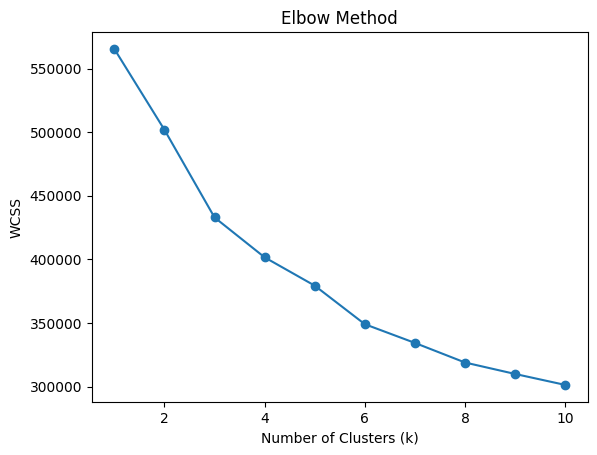

In [8]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_sample)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [9]:
cluster = KMeans(n_clusters=4, max_iter=100, random_state=42)
labels = cluster.fit_predict(df_sample)

score1 = silhouette_score(df_sample, labels)
score2 = calinski_harabasz_score(df_sample, labels)

print(f'Silhouette Score: {score1:.3f}')
print(f"calinski harabasz score: {score2:.3f}")

Silhouette Score: 0.154
calinski harabasz score: 4650.705


In [10]:
report = {
    "algorithm" : "KMeans",
    "parameter" : {
        "n-cluster" : 3,
        "max_iter" : 100
    },
    "Silhouette Score" : score1,
    "calinski_harabasz_score" : score2

}

In [11]:
report

{'algorithm': 'KMeans',
 'parameter': {'n-cluster': 3, 'max_iter': 100},
 'Silhouette Score': 0.15360692177320157,
 'calinski_harabasz_score': 4650.705012167394}

In [13]:
import os
import json

folder_path = "reports"
os.makedirs(folder_path, exist_ok=True)

report_file_path = os.path.join(folder_path, 'KMeans_reports.json')
with open(report_file_path, 'w') as f:
    json.dump(report, f, indent=4)

print(f"reprots stored successfully in: %s", report_file_path)

reprots stored successfully in: %s reports\KMeans_reports.json
